# <a class="anchor" id="table">Table of Contents</a>

I. [Matrix de Confusão](#ConfusionMatrix)<br>
II. [Acuracidade](#accuracy)<br>
III. [Precisão](#precision)<br>
IV. [Recall](#recall)<br>


In [1]:
import numpy as np
import random


%matplotlib inline

from util import matrix_confusao
from plot_chart import plot_confusion_matrix

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score


Dado y:

In [2]:
p = random.uniform(0.6, 0.8)
y = [np.random.choice([0, 1], p=[1-p, p]) for i in range(100)]
y[:5]

[1, 1, 1, 0, 1]

### Naive Predictor Performace

In [3]:
def random_predictors(n_predictors, n_predictions):
    predictions = []
    for n in range(n_predictors):
        p = random.uniform(0.6, 0.8)
        pred = [np.random.choice([0, 1], p=[1-p, p]) for i in range(n_predictions)]
        predictions.append((p, pred))
    return predictions, pred

In [4]:
preds_list, preds = random_predictors(1, 100)
print(preds_list [0:2])

[(0.6065809227419694, [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])]


## <a class="anchor" id="ConfusionMatrix"> Matriz de confusão</a>

In [5]:
conf_mtx = matrix_confusao(y, preds)
conf_mtx

array([[37, 35],
       [14, 14]], dtype=int64)

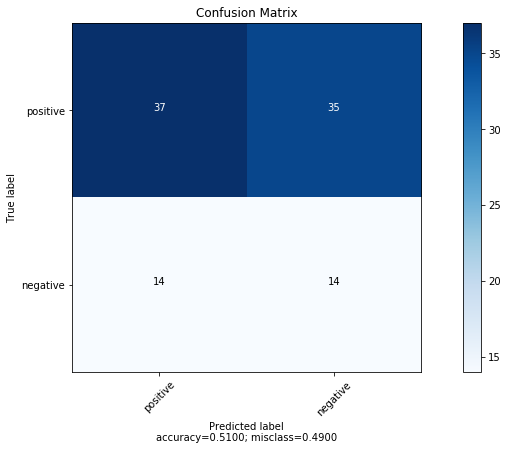

In [6]:
plot_confusion_matrix(cm           = conf_mtx, 
                      normalize    = False,
                      target_names = ['positive', 'negative'],
                      title        = "Confusion Matrix")

As colunas, predicted label, fazem referencias as predições enquanto as linhas, true label, fazem referencias aos valores corretos.

Dado que 1 é positivo e 0 é negativo.

|Valor        |Linha + coluna|Observação|
|-------------|--------------|----------|
|True Positive (TP)|positive + positive |O valor correto é positivo e o modelo preditou corretamente como positivo|  
|True Negative (TN)|negative + negative |O valor correto é negativo e o modelo predicou corretamente como negtivo|  
|False Negative (FN)|Positive + negative|O valor correto é negativo porém o modelo predicou erradamente como positivo | 
|False positive (FP)|Negativo + Positive|O valor correto é negativo porém o modelo predicou erradamente como positivo |

In [7]:
# Baseado nos resultados apresentados temos:
amostra = len(y)
TP = conf_mtx[0, 0] 
FN = conf_mtx[0, 1]
FP = conf_mtx[1, 0]
TN = conf_mtx[1, 1]

## <a class="anchor" id="accuracy">Acuracidade</a>

Quantas classificações foram feitas corretamente pelo modelo?

$$Accuracy (acc) = \frac{ True Positive + True Negative }{amostra}$$

In [8]:
acc = (TP+TN)/amostra
print(acc)

0.51


In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy_score(y, preds, normalize=True)

0.51

## <a class="anchor" id="precision">Precisão</a>

De todos os pontos preditos como positivo, qual a proporção de pontos que verdadeiramente são positivos (predição correta) e dos pontos verdadeiramente negativos (predição incorreta).

$$Precisão = \frac{ True Positive }{True Positive + False Positive}$$

Objetivo: Evitar falsos negativos

In [10]:
precision = TP/(TP+FP)
print(precision)

0.7254901960784313


In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
precision_score(y, preds, average='binary')

0.7254901960784313

## <a class="anchor" id="recall">Recall</a>

De todos os pontos que são verdadeiramente positivo, qual a proporção dos rotulados como positivo (predição correta) e dos rotulados como negativo (predição incorreta).

$$Precisão = \frac{ True Positive }{True Positive + False Negative}$$

Objetivo: Evitar Falsos Positivos

In [12]:
recall = TP/(TP+FN)
print(recall)

0.5138888888888888


In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
recall_score(y, preds, average='binary')

0.5138888888888888

[Voltar ao inicio](#table)<br>